# Индивидуальное задание 3 Линейная регрессия

# Задание 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import io

In [2]:
data = '''
id,X,Y
1,22,45
2,19,42
3,11,23
4,7,23
5,13,23
6,20,39
7,8,19
8,12,21
9,15,28
10,23,65
'''

df = pd.read_csv(io.StringIO(data), index_col='id')

In [3]:
df.head()

,X,Y
id,,
1,22,45
2,19,42
3,11,23
4,7,23
5,13,23


In [4]:
X = np.array(df['X']).reshape(-1, 1)
X_mean = df['X'].mean()
X_mean

15.0

In [5]:
Y = np.array(df['Y']).reshape(-1, 1)
Y_mean = df['Y'].mean()
Y_mean

32.8

## Параметры вручную

In [6]:
teta_1 = sum((X - X_mean)*(Y - Y_mean))/sum((X - X_mean)**2)
teta_0 = Y_mean - teta_1*X_mean

print(teta_1, teta_0)

[2.2972973] [-1.65945946]


## Обучение


In [7]:
Regression = LinearRegression().fit(X,Y)
Y_pred = Regression.predict(X)

In [8]:
R2_stat = 1 - sum((Y - Y_pred)**2)/sum((Y - Y_mean)**2)
R2_stat

array([0.80127316])

## Получение коэффициентов через модель

In [ ]:
Regression.coef_, Regression.intercept_

(array([[2.37113402]]), array([-3.29896907]))

In [ ]:
Regression.score(X, Y)

0.8802057695907487

# Задание 2


In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statistics

In [10]:
data = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/fed9823d73d2b53f5591d98b87c20b8a/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/fish_train.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550


In [11]:
X = data.drop('Weight', axis=1).copy()
y = data['Weight'].copy()

In [12]:
r_state = 33

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=r_state,
                                                    stratify=X['Species'])

In [14]:
train_species = X_train['Species'].copy().reset_index(drop=True)
test_species = X_test['Species'].copy().reset_index(drop=True)

In [15]:
train_species

0     Bream
1      Pike
2     Perch
3     Roach
4     Perch
      ...  
90    Bream
91    Perch
92    Roach
93    Bream
94    Roach
Name: Species, Length: 95, dtype: object

In [16]:
X_train, X_test = X_train.drop(columns = ['Species']), X_test.drop(columns = ['Species'])

In [17]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [18]:
X_train['Width'].mean()

4.511373684210526

In [ ]:
X_train.head()

,Length1,Length2,Length3,Height,Width
0,28.7,31.0,36.2,14.3714,4.8146
1,29.5,31.7,35.0,9.4850,5.3550
2,18.2,19.8,22.2,5.6166,3.1746
3,44.8,48.0,51.2,7.6800,5.3760
4,11.3,11.8,13.1,2.2139,1.2838


### Модель регрессии


In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [20]:
r2_score(y_test, y_pred)

0.8792796294191979

## PCA

<Axes: >

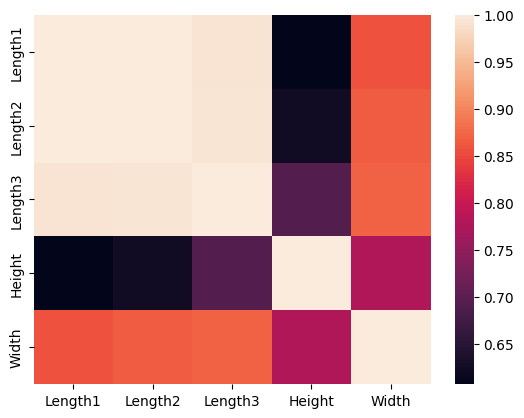

In [ ]:
sns.heatmap(X_train.corr())

Length1, Length2, Length3

In [21]:
lengths = ['Length1', 'Length2', 'Length3']
X_train_fixed = X_train.copy()

In [22]:
pca = PCA(n_components=1, svd_solver='full')
pca.fit(X_train[lengths])
X_train['Lengths'] = pca.transform(X_train[lengths])
X_train = X_train.drop(lengths, axis = 1)
X_test['Lengths'] = pca.transform(X_test[lengths])
X_test = X_test.drop(lengths, axis = 1)

In [26]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.8747300189898147

In [ ]:
# cov_matrix = np.cov(X_len_centered.T, ddof=0)
# eigvalues, eigvectors = np.linalg.eig(cov_matrix)

# print(eigvalues)
# print(eigvectors)

# v = -eigvectors[:, np.argmax(eigvalues)]
# v

In [24]:
np.var(X_train['Lengths'])/sum(np.var(X_train_fixed[lengths]))

0.996307086811181

## Модификация признаков

In [27]:
X_train_cube = X_train**3
X_test_cube = X_test**3
X_train_cube['Width'].mean()

130.73976610233888

In [28]:
X_test_cube.head()

,Height,Width,Lengths
0,247.082047,51.686703,-994.052552
1,355.888340,59.593201,-225.264387
2,142.432927,36.647301,-7493.283098
3,1381.204114,216.324162,5008.465266
4,1107.368679,49.172711,-980.302054


<Axes: xlabel='Width', ylabel='Weight'>

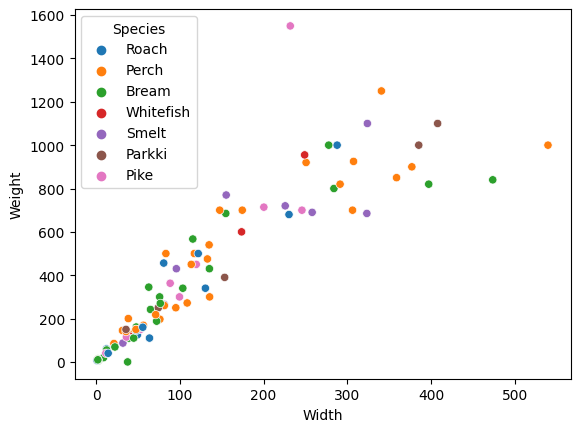

In [29]:
sns.scatterplot(x=X_train_cube['Width'], y=y_train, hue=X['Species'] )

In [30]:
lr.fit(X_train_cube, y_train)
y_pred = lr.predict(X_test_cube)
r2_score(y_test, y_pred)

0.9517253742436977

## One Hot Encoding

In [31]:
X_train_cube_k = X_train_cube.join(pd.get_dummies(train_species)).copy()

In [32]:
X_test_cube_k = X_test_cube.join(pd.get_dummies(test_species)).copy()

In [33]:
X_train_cube_k.head()

,Height,Width,Lengths,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,6812.536313,287.888218,3438.701267,1,0,0,0,0,0,0
1,472.001304,134.974119,13925.869133,0,0,0,1,0,0,0
2,1516.277341,473.767597,1039.878915,0,0,1,0,0,0,0
3,330.699148,47.879600,-662.806623,0,0,0,0,1,0,0
4,228.099131,43.800328,-1987.913818,0,0,1,0,0,0,0


In [34]:
X_test_cube_k.head()

,Height,Width,Lengths,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,247.082047,51.686703,-994.052552,0,0,1,0,0,0,0
1,355.888340,59.593201,-225.264387,0,0,0,0,1,0,0
2,142.432927,36.647301,-7493.283098,0,0,1,0,0,0,0
3,1381.204114,216.324162,5008.465266,0,0,1,0,0,0,0
4,1107.368679,49.172711,-980.302054,0,1,0,0,0,0,0


In [35]:
lr.fit(X_train_cube_k, y_train)
y_pred = lr.predict(X_test_cube_k)
r2_score(y_test, y_pred)

0.9451545130502372

### k - 1

In [ ]:
X_train_cube_k1 = X_train_cube.join(pd.get_dummies(train_species, drop_first=True)).copy()
X_test_cube_k1 = X_test_cube.join(pd.get_dummies(test_species, drop_first=True)).copy()


In [ ]:
lr.fit(X_train_cube_k1, y_train)
y_pred = lr.predict(X_test_cube_k1)
r2_score(y_test, y_pred)

0.9323678887715362

# Задание 3

### Обучение

In [ ]:
data = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/fed9823d73d2b53f5591d98b87c20b8a/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/fish_train.csv')

In [ ]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550


In [ ]:
X = data.drop('Weight', axis=1).copy()
y = data['Weight'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=r_state,
                                                    stratify=X['Species'])

train_species = X_train['Species'].copy().reset_index(drop=True)
test_species = X_test['Species'].copy().reset_index(drop=True)

X_train, X_test = X_train.drop(columns = ['Species']), X_test.drop(columns = ['Species'])

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.8394105176747895

In [ ]:
X_train_cube = X_train**3
X_test_cube = X_test**3
lr.fit(X_train_cube, y_train)
y_pred = lr.predict(X_test_cube)
r2_score(y_test, y_pred)

0.9477112688621474

In [ ]:
X_train_cube_k = X_train_cube.join(pd.get_dummies(train_species)).copy()
X_test_cube_k = X_test_cube.join(pd.get_dummies(test_species)).copy()
lr.fit(X_train_cube_k, y_train)
y_pred = lr.predict(X_test_cube_k)
r2_score(y_test, y_pred)

0.96317723152806

In [ ]:
X_train_cube_k.head()

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,23639.903,29791.000,47437.928,2968.227824,111.604225,1,0,0,0,0,0,0
1,25672.375,31855.013,42875.000,853.320159,153.560114,0,0,0,0,1,0,0
2,6028.568,7762.392,10941.048,177.182362,31.993889,0,0,0,0,1,0,0
3,89915.392,110592.000,134217.728,452.984832,155.373797,0,0,0,1,0,0,0
4,1442.897,1643.032,2248.091,10.851106,2.115885,0,0,0,0,0,1,0


### Прогнозы

In [ ]:
fish = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/33b24e589714e963ea7081912668c93d/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/fish_reserved.csv')

In [ ]:
fish.head()

,Species,Length1,Length2,Length3,Height,Width
0,Roach,19.4,21.0,23.7,6.1146,3.2943
1,Perch,19.3,21.3,22.8,6.3840,3.5340
2,Perch,17.2,19.0,20.2,5.6358,3.0502
3,Parkki,17.5,19.0,21.3,8.3922,2.9181
4,Parkki,16.3,17.7,19.8,7.4052,2.6730


In [ ]:
fish = fish.join(pd.get_dummies(fish['Species'])).drop('Species', axis=1)

In [ ]:
fish_cube = fish**3

In [ ]:
fish_cube.head()

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,7301.384,9261.000,13312.053,228.614702,35.751102,0,0,0,0,1,0,0
1,7189.057,9663.597,11852.352,260.182831,44.136677,0,0,1,0,0,0,0
2,5088.448,6859.000,8242.408,179.005641,28.378207,0,0,1,0,0,0,0
3,5359.375,6859.000,9663.597,591.054429,24.848519,0,1,0,0,0,0,0
4,4330.747,5545.233,7762.392,406.078856,19.098395,0,1,0,0,0,0,0


In [ ]:
y_pred = lr.predict(fish_cube)
y_pred = pd.DataFrame(y_pred)

In [ ]:
y_pred.transpose().to_csv(r'/content/predict.csv', index= False)